# Analysis of "House Rocket" dataset

### In this section we will explorate the House Rocket dataset. We will follow the following steps:

1. Identify missing or duplicate values and treat them if necessary
2. Calculate Descriptive Statistics 
3. Identify if there are outliers in the dataset and treat them if necessary
4. Explorate correlation of houses prices with other variables

In [1]:
# Import Libraries necessary for this project
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

# Import my modules from "src"
import sys
sys.path.append('../src/') #Add folder "src" as a package path

import data.process_data as process_data
import data.load_data as load_data

In [2]:
# Load the House Rocket dataset
houses = load_data.load_data("../data/raw/kc_house_data.csv")

# TODO: Rename Columns and convert Date Column
columns = ['ID','Date','Price','Bedrooms','Bathrooms','Sqft Living','Sqft Lot','Floors','Waterfront','View','Condition','Grade','Sqft Above','Sqft Basement','Year Built','Year Renovated','ZipCode','Latitude','Longitude','Sqft Living 15','Sqft Lot 15']
houses.columns = columns

houses["Date"] = pd.to_datetime(houses["Date"]).dt.strftime('%d-%m-%Y')

# TODO: Save DataFrame with renamed columns in data interim
houses.to_csv("../data/interim/renamed_data.csv", index=False)

House Rocket dataset has been successfully loaded, has 21613 rows and 21 columns.


# Data Cleaning
### In this section we will check dataset integrity.

In [3]:
# TODO: Check duplicade rows in dataset
process_data.duplicated_rows(houses)

# TODO: Check if has missing values in dataset
process_data.missing_values(houses)


Duplicated rows

The dataset has 0 rows duplicated
---------------------------------
Missing Values in each column

ID                0
Date              0
Price             0
Bedrooms          0
Bathrooms         0
Sqft Living       0
Sqft Lot          0
Floors            0
Waterfront        0
View              0
Condition         0
Grade             0
Sqft Above        0
Sqft Basement     0
Year Built        0
Year Renovated    0
ZipCode           0
Latitude          0
Longitude         0
Sqft Living 15    0
Sqft Lot 15       0
dtype: int64
---------------------------------


#### The dataset has no duplicate rows or missing values.

# Data Exploratory
### In this section we will explorate the House Rocket dataset. We will follow the following steps:

1. Calculate Descriptive Statistics 
3. Identify if there are outliers in the dataset and treat them if necessary
2. Explorate correlation of houses prices with other variables


## Calculating Desciptive Statistics
We'll start with calculating some descriptive statistics about the House Rocket prices and plot a distribuition graphic of Price

In [4]:
# Descriptive statistics
process_data.descriptive_statistics(houses, 'Price')

Avarage Price: 540,088.14
Median Price: 450,000.00
Minimun Price: 75,000.00
Maximun Price: 7,700,000.00
The std Price: 367,127.20


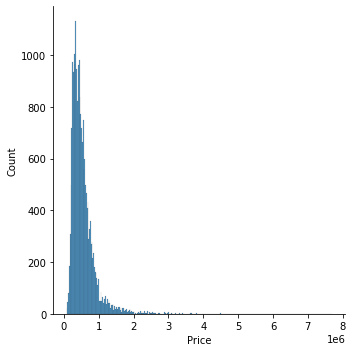

In [5]:
# Distribution Graphic of Price
sns.displot(houses['Price']);

plt.savefig("../reports/figures/hist_price_with_outliers.png") #Save Graphic
plt.show()

### Observarions
After observing the price statistic, the difference between the Average Price and the Maximum Price is clear, the graph shows us how abnormal the price distribution is, this would mean that there may be outlier houses in the data set, houses with prices much above the average that can distort the result of the exploratory analysis, so we'll identify them and create a new DataFrame without them. 

# Treating Outliers
I will use the "Inter Quartile Range" (IQR) method to find the outliers, then plot two Box Plot type graphs comparing the price dispersion before and after excluding the outliers.

## Inter Quartile Range (IQR) Method
In the "IQR" method, we will find the lower and upper price limit values ​​through operations with the quartiles, everything outside these limits will be considered an outlier.

First we need to define what a quartile is. According to Wikipedia:

"A quartile is any one of three values ​​that divides the ordered set of data into four equal parts, so each part represents 1/4 of the sample or population.

So, in the case of an ordered sample,

* First quartile (referred to as Q1/4) = lower quartile = is the value at 25% of the ordered sample = 25th percentile
* Second quartile (referred to as Q2/4) = median = the value up to which 50% of the ordered sample is found = 50th percentile, or 50th decile.
* Third quartile (referred to as Q3/4) = upper quartile = value from which 25% of the highest values ​​are found = value at 75% of the ordered sample = 75th percentile"

### To find the lower and upper limit of prices, we need to carry out trades with Quartiles.

1- We need to find the Inter Quartil Range (IQR). For this we need to subtract the 3rd quartile from the 1st quartile.

2- To find the upper limit, we need to add to the 3rd quartile the multiplication of the IQR by 1.5.

3- To find the lower limit, we need to subtract from the 1st quartile the multiplication of the IQR by 1.5.

In [6]:
# Inter Quartile Range (IQR) Method Function
upper_limit, lower_limit = process_data.outliers_iqr( data=houses, column='Price' )

Lower Bound: -162,625.00 
Upper Bound: 1,129,575.00
1146 lines with outliers were identified, corresponding to 5.30% of the data set.


#### Now we see that 5.30% of the dataset was considered an outlier, but deleting this large amount of data would result in loss of information. So, let's pass a parameter where only values ​​above 150% of the maximum limit are considered an outliers and return a DataFrame.

In [7]:
# TODO: Calculate 150% of upper limit
houses_without_outliers = process_data.outliers_iqr( data=houses, column='Price', upper=1.5, returns='dataframe' )

Lower Bound: -162,625.00 
Upper Bound: 1,694,362.50
366 lines with outliers were identified, corresponding to 1.69% of the data set.


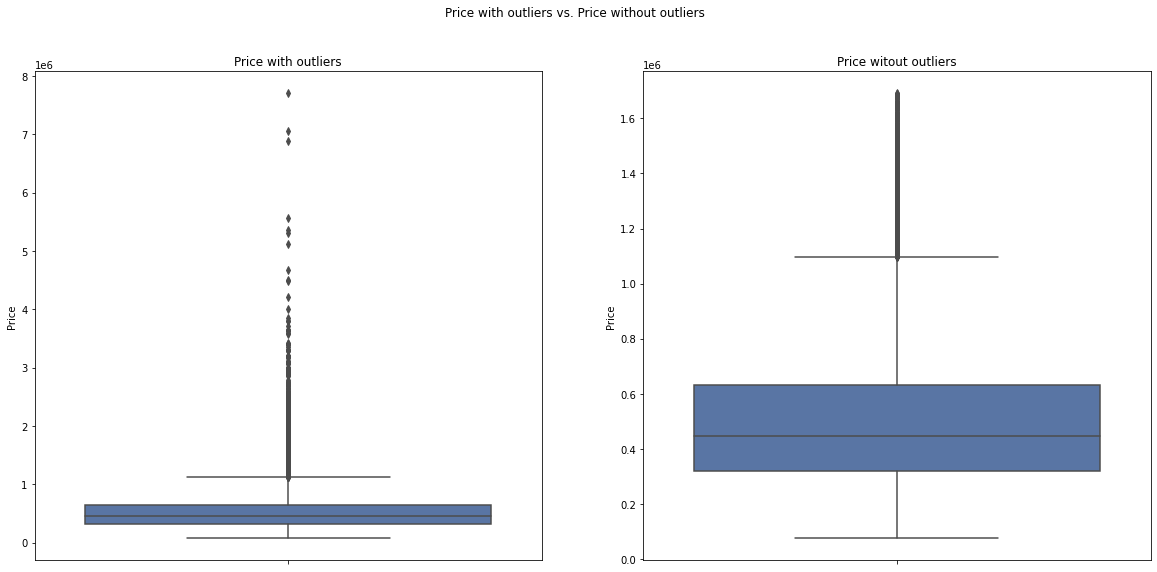

In [8]:
# Box Plot graphics comparassing with dataset with outliers and without outliers
fig, axes = plt.subplots( 1, 2, figsize=(20,9), sharex=True )
fig.suptitle('Price with outliers vs. Price without outliers')
sns.set_theme(style="whitegrid")

# Price with outliers
sns.boxplot( ax=axes[0], y=houses['Price'] )
axes[0].set_title('Price with outliers');

# Price without outliers
sns.boxplot( ax=axes[1], y=houses_without_outliers['Price'] )
axes[1].set_title('Price witout outliers');

plt.savefig("../reports/figures/box_price_comparassing.png") #Save Graphic

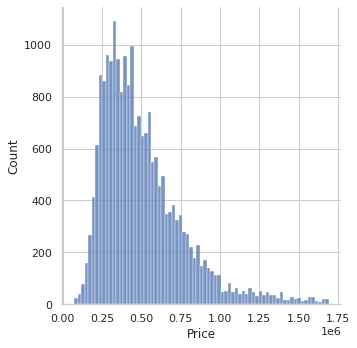

In [9]:
# Distribution Graphic 
sns.displot( houses_without_outliers['Price'] );

plt.savefig("../reports/figures/hist_price_without_outliers.png") #Save Graphic
plt.show()

#### After comparing the two graphs and the distribution graphic, the difference in price distribution in the dataset with outliers and without outliers is visible, but analyzing the data without outliers results in a loss of information, keep that in mind.

In [10]:
# TODO: Save DataFrame in path "data/outliers/..."
houses_without_outliers.to_csv("../data/without_outliers/houses_without_outliers.csv", index=False)

# TODO: Define variable "houses" as "houses_without_outliers" dataframe copy
houses = houses_without_outliers.copy()

# Correlation of price with Variables
Now let's look at the correlation between price and other variables in the dataset, then based on that identify the variables that have the most correlation with price.

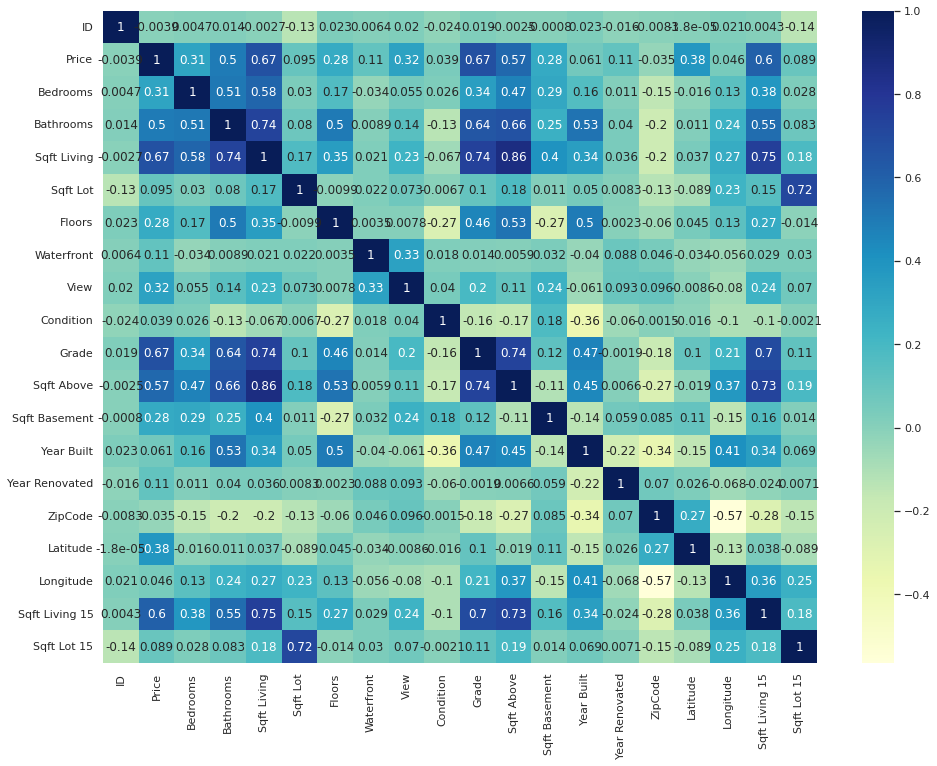

In [11]:
# Plot a HeatMap with corraltion
corr = houses.corr()

plt.figure(figsize=(16, 12))
sns.heatmap( corr,  annot=True, xticklabels=True, yticklabels=True, cmap="YlGnBu" );

plt.savefig("../reports/figures/heatmap_correlation.png")# Save Graphic
plt.show()

In [12]:
# Table with correlation of which variable with price
corr['Price'].sort_values(ascending=False)

Price             1.000000
Grade             0.673951
Sqft Living       0.669080
Sqft Living 15    0.598269
Sqft Above        0.570982
Bathrooms         0.497622
Latitude          0.381467
View              0.324330
Bedrooms          0.313093
Sqft Basement     0.282128
Floors            0.277596
Year Renovated    0.111432
Waterfront        0.111261
Sqft Lot          0.095190
Sqft Lot 15       0.089356
Year Built        0.060906
Longitude         0.045860
Condition         0.039280
ID               -0.003901
ZipCode          -0.035342
Name: Price, dtype: float64

Based on the Graphic and table above, the variables "Grade" and "Sqft Living" are the most correlated with price.

        * "Grade" is the grade for the quality of the house's construction materials, ranging from 1 to 13
        
        * "Sqft Living" is the number of square feet of the house itself.

Now let's see the correlation of price with "Grade" and "Sqft Living" specifically.

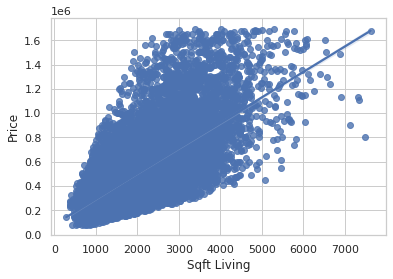

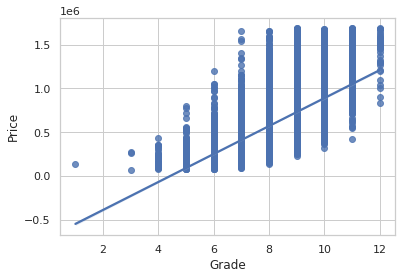

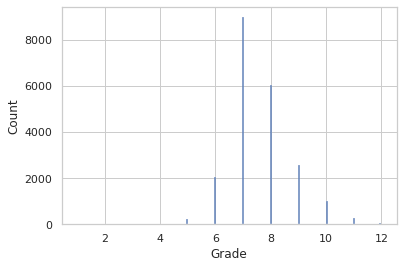

In [13]:
# Plot graphs with the correlation between price and other variables
cont = 0
for var in ['Sqft Living','Grade','Grade']:
    cont += 1
    if cont < 3:
        sns.regplot( x=houses[var], y=houses['Price'] );
        plt.show()
    else:
        sns.histplot( houses[var] );

Looking specifically at the 1nd chart we can see that after 2,000 square feet the maximum house price normalizes, but the minimum price keeps rising from the start, making the positive correlation between price and square foot even more visible.

Looking at the 2rd graph we see that the maximum price rises according to the quality of the house's materials, and in the last graph we can see that there is a large concentration of houses with the same grade, so let's see what this grade is and the average price of each note.

In [14]:
# TODO: Calculate the number of houses per grade
houses['Grade'].value_counts()

7     8980
8     6053
9     2562
6     2038
10    1008
11     294
5      242
12      37
4       29
3        3
1        1
Name: Grade, dtype: int64

In [15]:
# TODO: Calculate the mean price per grade
price_by_grade = houses[['Price','Grade']].groupby('Grade').mean().reset_index()
price_by_grade['Price'].map(lambda x: '%.2f' % x) # Remove Scientific Notation

0      142000.00
1      205666.67
2      214381.03
3      248523.97
4      301919.64
5      402406.81
6      539073.45
7      748263.85
8      938168.83
9     1160921.94
10    1410879.46
Name: Price, dtype: object

Based on the two tables above, we observe that a large number of houses have a 7 or 8 grade, and each grade has an average price of 748,263.85 and 938,168.43 respectively.

In my analysis, homes rated 8 or higher have the best average price by rating and number of homes.

# Final Observations

### 1. The dataset has a large amount of outliers identified by the Inter Quartitle Range method, approximately 5.30%, but we consider only 1.69% of the dataset as outliers
### 2. The variables with the highest positive correlation with price are "Grade" and "Sqft living".
### 3. The larger the amount of square feet of the house, the more expensive its price is.
### 4. Houses rated 8 or higher in the "Grid" attribute have the best average price per rank and number of homes.